In [45]:
import pandas as pd

In [46]:
df16 = pd.read_csv("finbraRREO2016.csv", encoding='latin-1', skiprows=5, sep=';')
df17 = pd.read_csv("finbraRREO2017.csv", encoding='latin-1', skiprows=5, sep=';')
df18 = pd.read_csv("finbraRREO2018.csv", encoding='latin-1', skiprows=5, sep=';')
df19 = pd.read_csv("finbraRREO2019.csv", encoding='latin-1', skiprows=5, sep=';')
df20 = pd.read_csv("finbraRREO2020.csv", encoding='latin-1', skiprows=5, sep=';')
df21 = pd.read_csv("finbraRREO2021.csv", encoding='latin-1', skiprows=5, sep=';')
df22 = pd.read_csv("finbraRREO2022.csv", encoding='latin-1', skiprows=5, sep=';')
df23 = pd.read_csv("finbraRREO2023.csv", encoding='latin-1', skiprows=5, sep=';')

tributacoes = ['ISS', 'IPTU', 'ITBI', 'Cota-Parte do ICMS', 'Cota-Parte do IPVA']
estados = ['PB', 'PE', 'AL', 'BA', 'RJ']

df16 = df16[(df16['UF'].isin(estados)) & (df16['Conta'].isin(tributacoes))]
df17 = df17[(df17['UF'].isin(estados)) & (df17['Conta'].isin(tributacoes))]
df18 = df18[(df18['UF'].isin(estados)) & (df18['Conta'].isin(tributacoes))]
df19 = df19[(df19['UF'].isin(estados)) & (df19['Conta'].isin(tributacoes))]
df20 = df20[(df20['UF'].isin(estados)) & (df20['Conta'].isin(tributacoes))]
df21 = df21[(df21['UF'].isin(estados)) & (df21['Conta'].isin(tributacoes))]
df22 = df22[(df22['UF'].isin(estados)) & (df22['Conta'].isin(tributacoes))]
df23 = df23[(df23['UF'].isin(estados)) & (df23['Conta'].isin(tributacoes))]


df16['Ano'] = 2016
df17['Ano'] = 2017
df18['Ano'] = 2018
df19['Ano'] = 2019
df20['Ano'] = 2020
df21['Ano'] = 2021
df22['Ano'] = 2022
df23['Ano'] = 2023

In [47]:
df23['Conta'].unique()

array(['IPTU', 'ISS', 'ITBI', 'Cota-Parte do ICMS', 'Cota-Parte do IPVA'],
      dtype=object)

In [48]:
df = pd.concat([df16, df17, df18, df19, df20, df21, df22, df23])
df.to_csv('finbraRREOgeral.csv', index=False)

In [49]:
df = pd.read_csv('finbraRREOgeral.csv')

In [50]:
df = df[df['Conta'].isin(tributacoes)]

In [51]:
cidades = ['João Pessoa', 'Cabedelo', 'Conde - PB', 'Lucena', 'Rio Tinto', 'Mataraca', 'Baía da Traição', 'Pitimbu', 'marcação', 'Ipojuca', 'Maragogi - AL', 'Mata de São João', 'Búzios', 'Arraial do Cabo', 'Paraty']
regex = '|'.join(cidades)
df = df[df['Instituição'].str.contains(regex, case=False, na=False)]

In [52]:
df.info() # Sem valores faltantes

<class 'pandas.core.frame.DataFrame'>
Index: 7980 entries, 3137 to 491964
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Instituição             7980 non-null   object
 1   Cod.IBGE                7980 non-null   int64 
 2   UF                      7980 non-null   object
 3   População               7980 non-null   int64 
 4   Coluna                  7980 non-null   object
 5   Conta                   7980 non-null   object
 6   Identificador da Conta  7980 non-null   object
 7   Valor                   7980 non-null   object
 8   Ano                     7980 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 623.4+ KB


In [53]:
import matplotlib.pyplot as plt

# Convert the 'Valor' column to numeric, removing any commas
df['Valor'] = df['Valor'].str.replace(',', '').astype(float)

# Get the distinct 'Conta' values
contas = df['Conta'].unique()

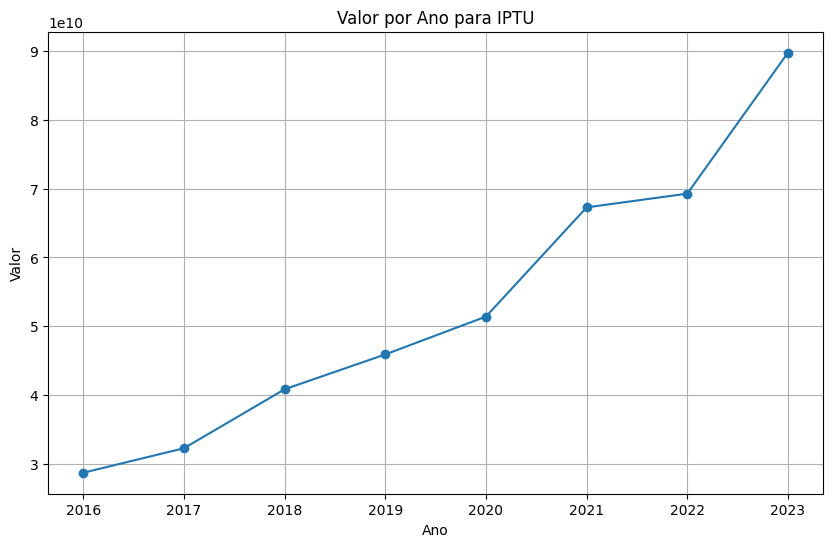

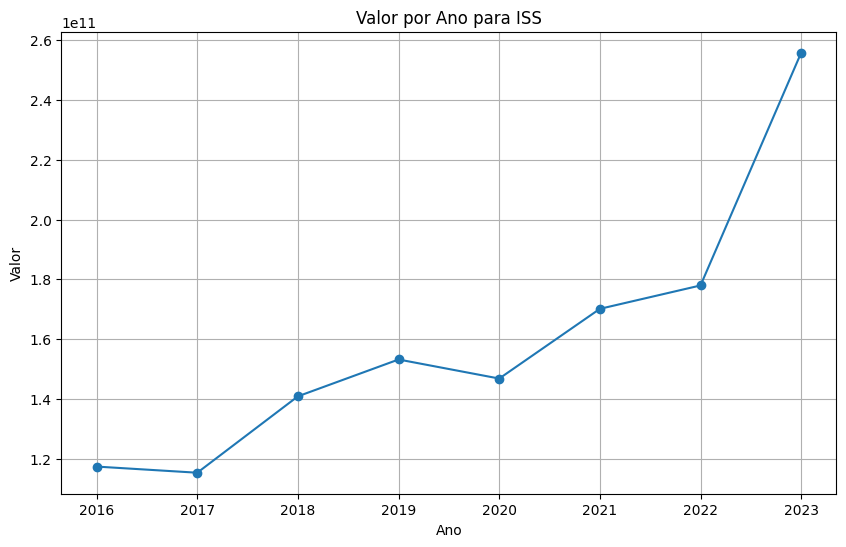

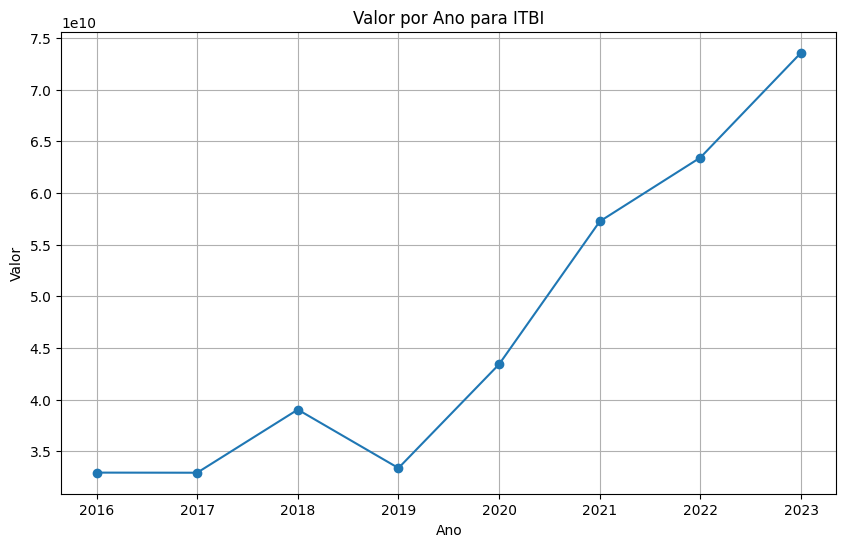

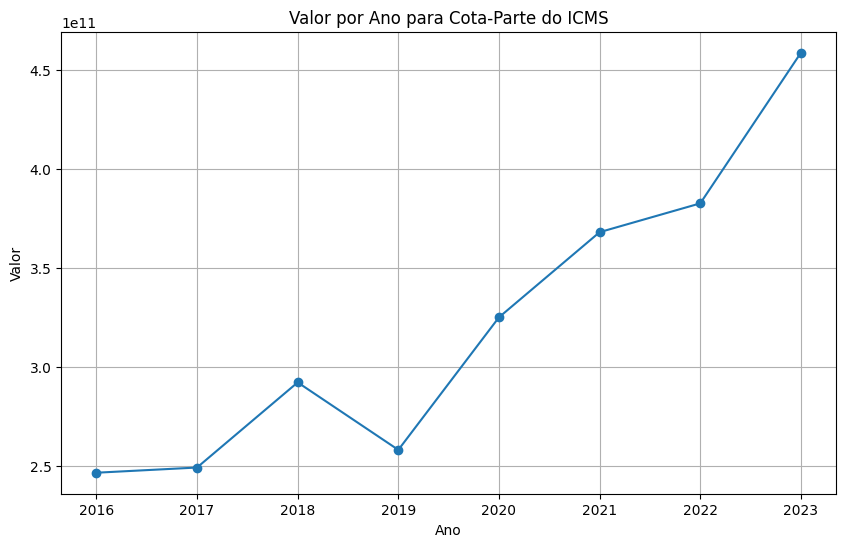

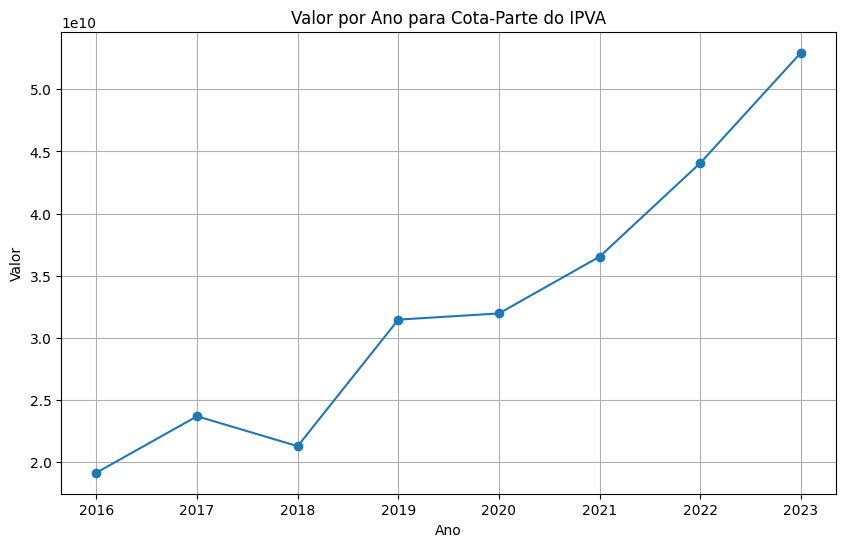

In [54]:
for conta in contas:
    df_conta = df[df['Conta'] == conta]
    df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(df_conta['Ano'], df_conta['Valor'], marker='o')
    plt.title(f'Valor por Ano para {conta}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.show()

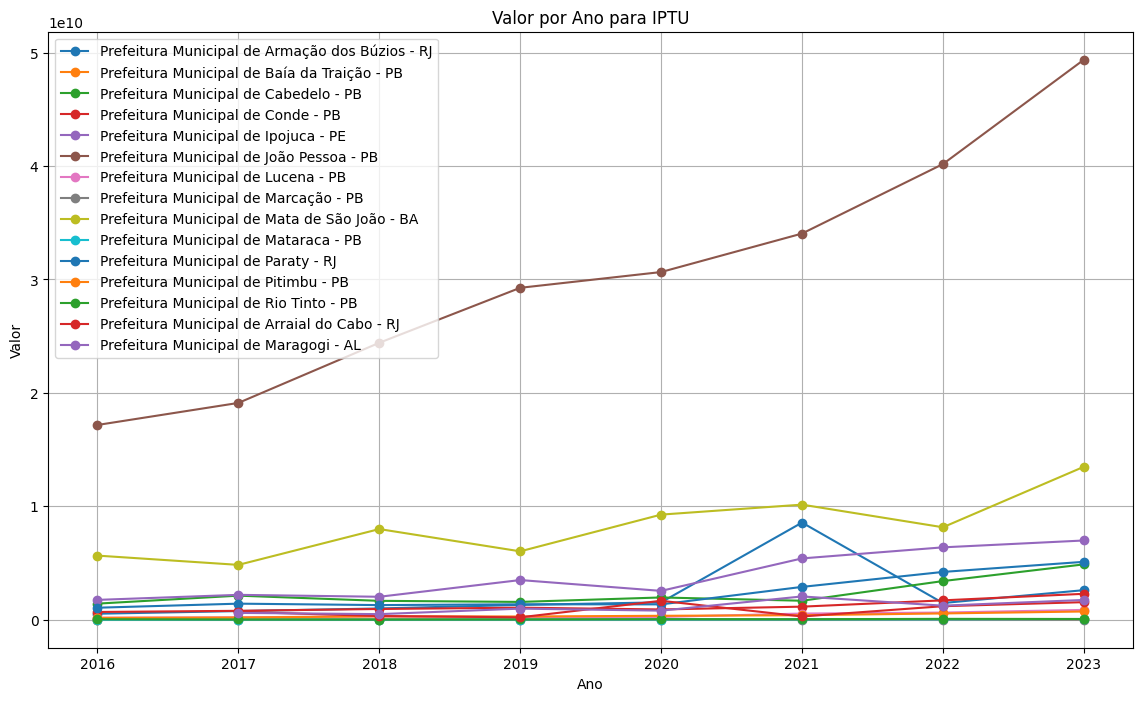

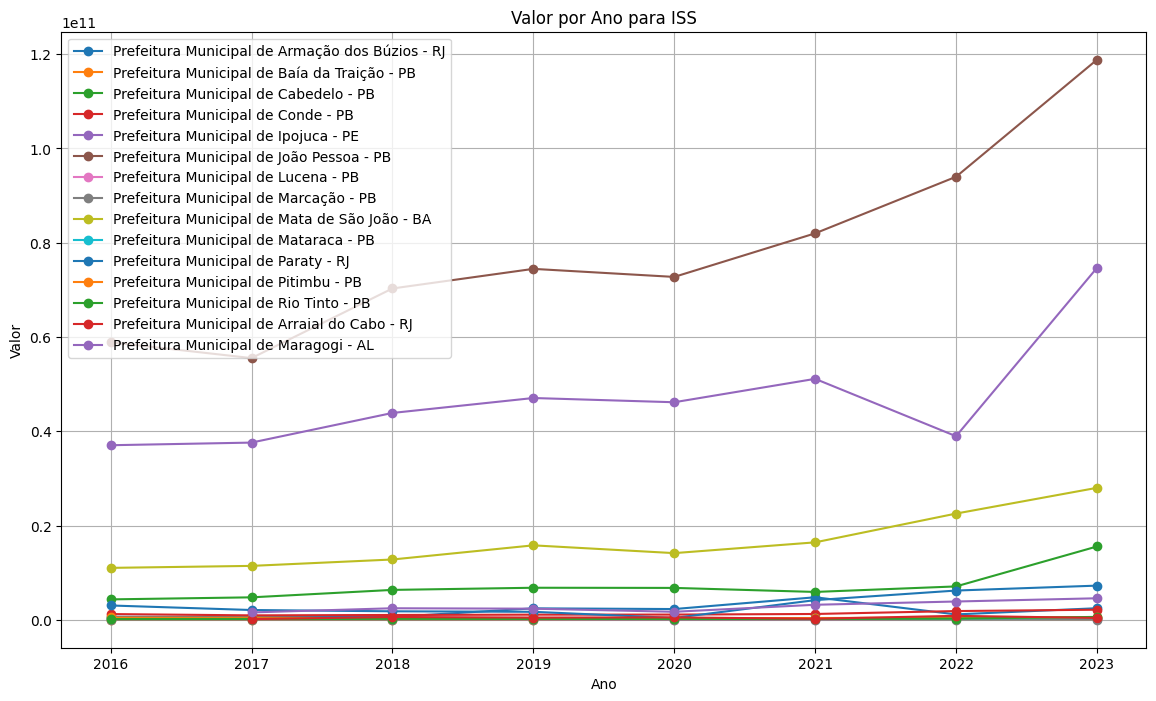

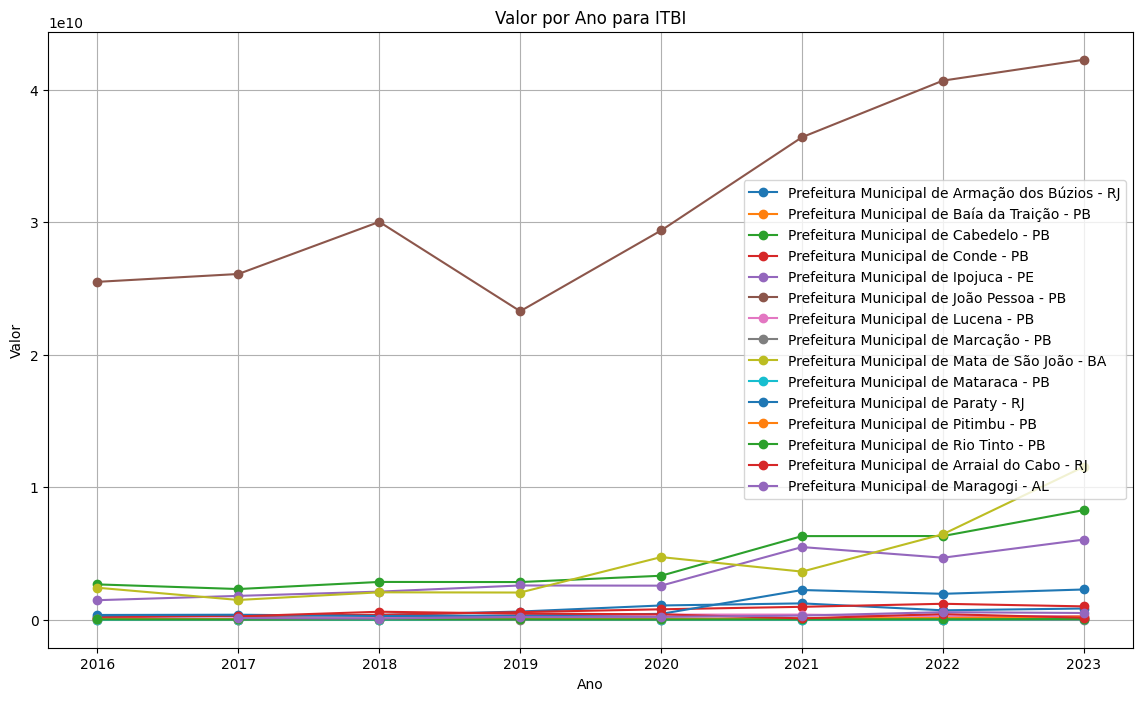

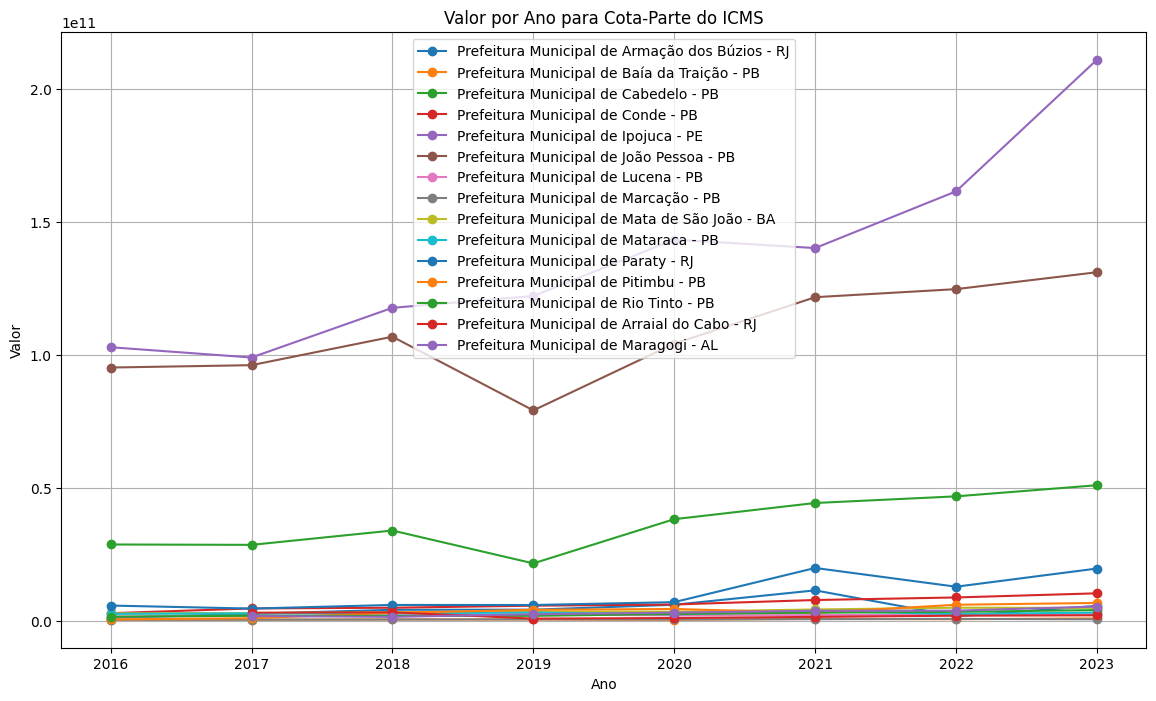

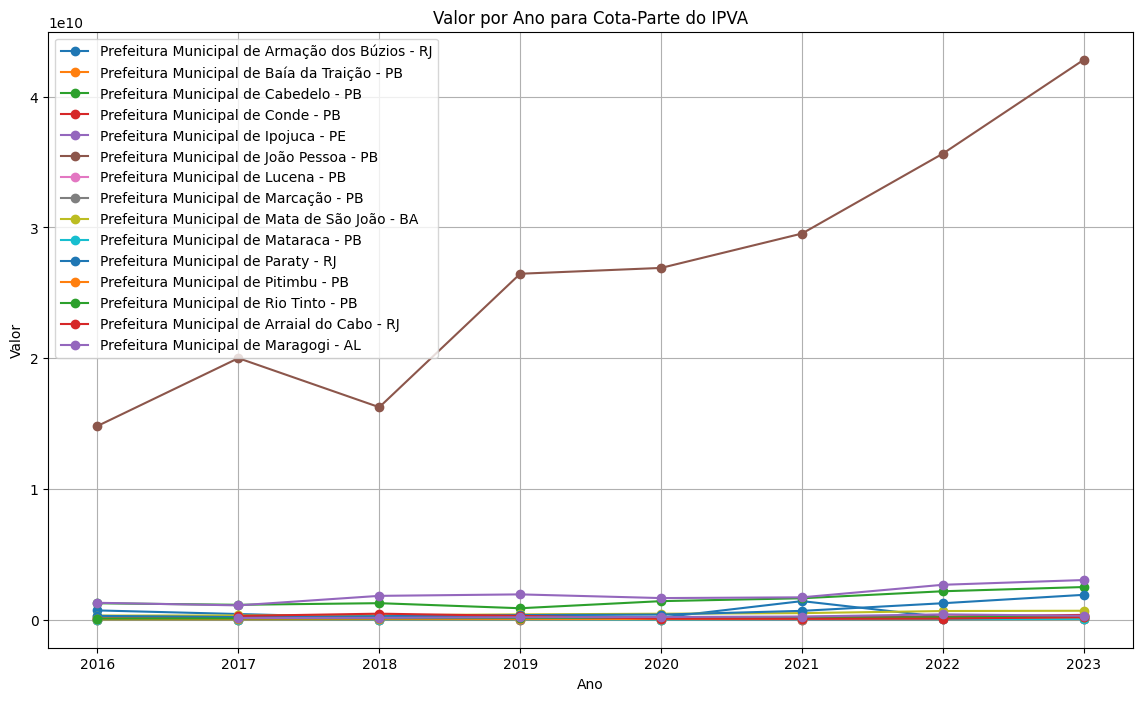

In [55]:
for conta in contas:
    df_conta = df[df['Conta'] == conta]
    df_conta = df_conta.groupby(['Ano', 'Conta', 'Instituição'])['Valor'].sum().reset_index()
    plt.figure(figsize=(14, 8))
        
    for instituicao in df_conta['Instituição'].unique():
        df_instituicao = df_conta[df_conta['Instituição'] == instituicao]
        plt.plot(df_instituicao['Ano'], df_instituicao['Valor'], marker='o', label=instituicao)
    
    plt.title(f'Valor por Ano para {conta}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend()
    plt.show()


### Observação

Como não havia valores faltantes e nenhum outlier significativo, o tópico de 3 de preenchimento de lacunas foi pulado

In [56]:
df['Conta'].unique()

array(['IPTU', 'ISS', 'ITBI', 'Cota-Parte do ICMS', 'Cota-Parte do IPVA'],
      dtype=object)

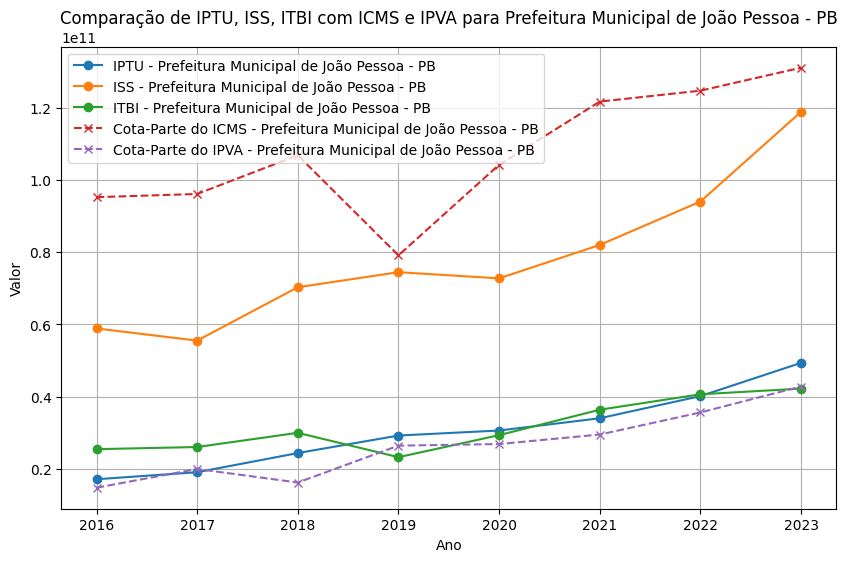

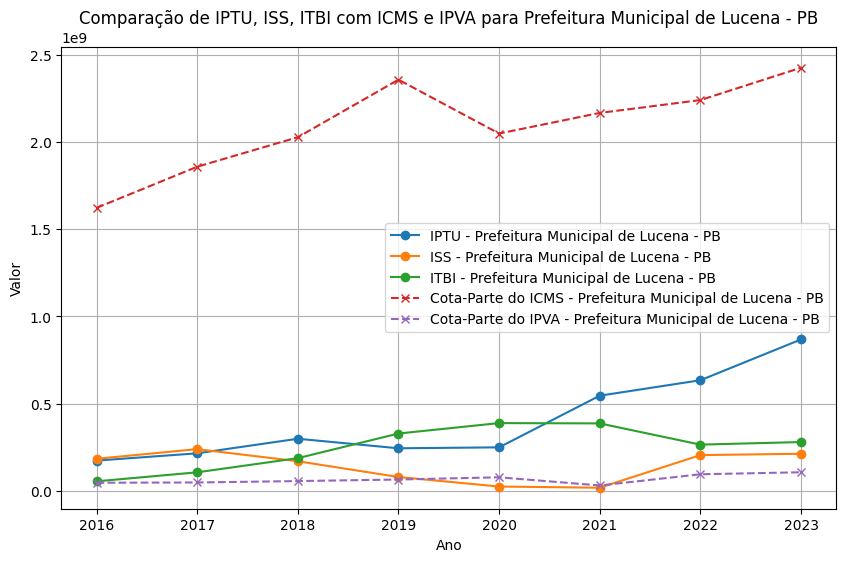

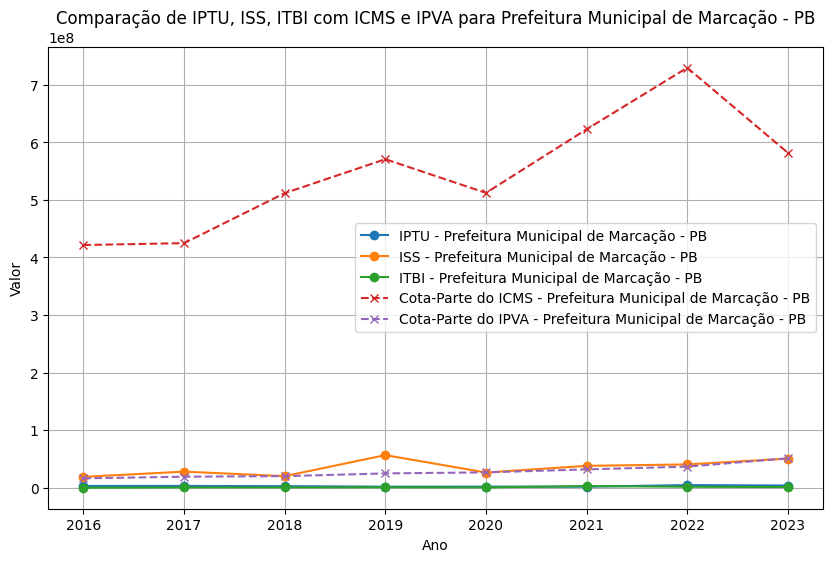

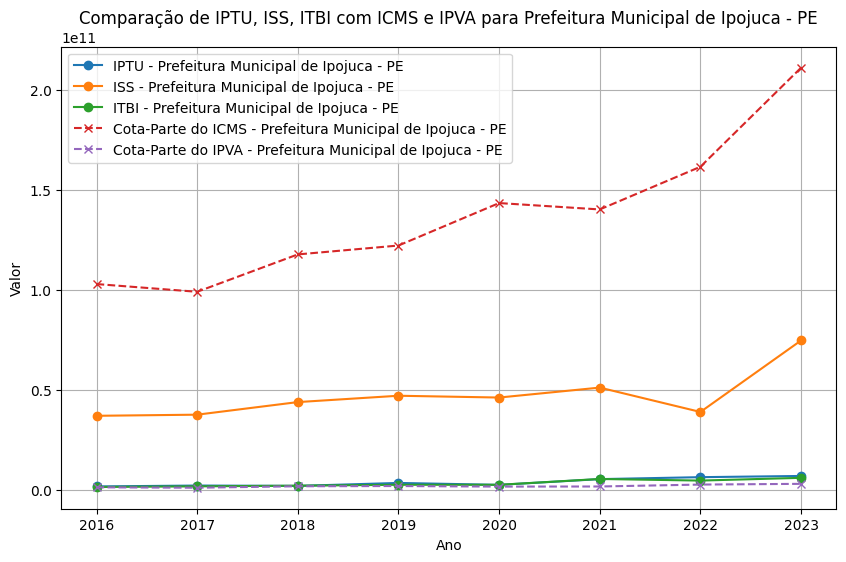

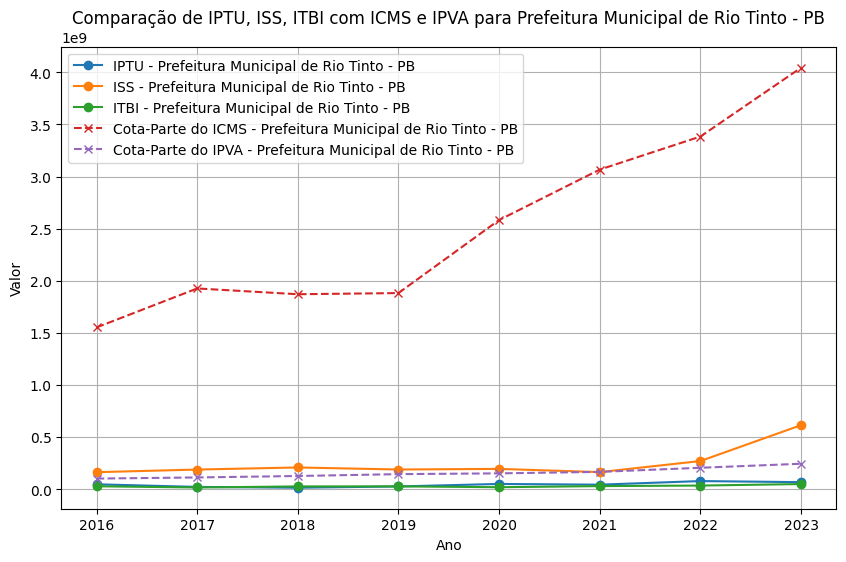

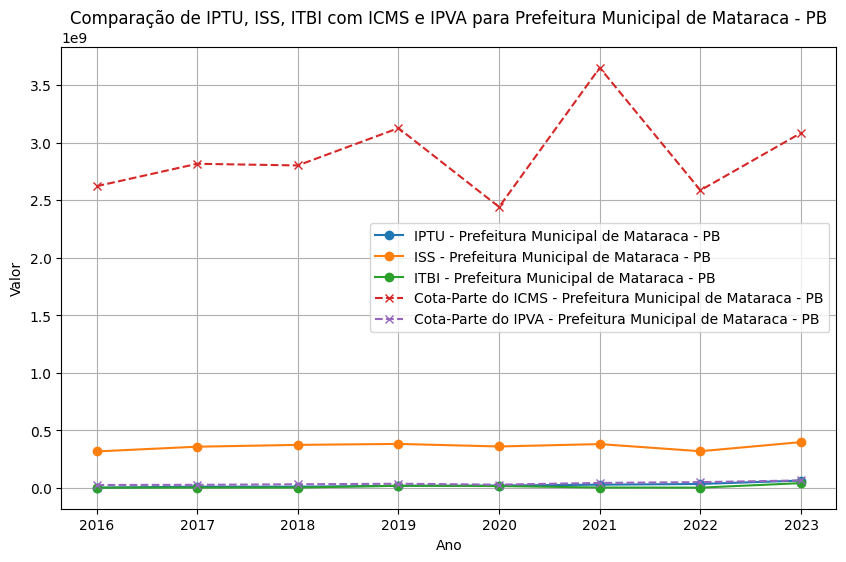

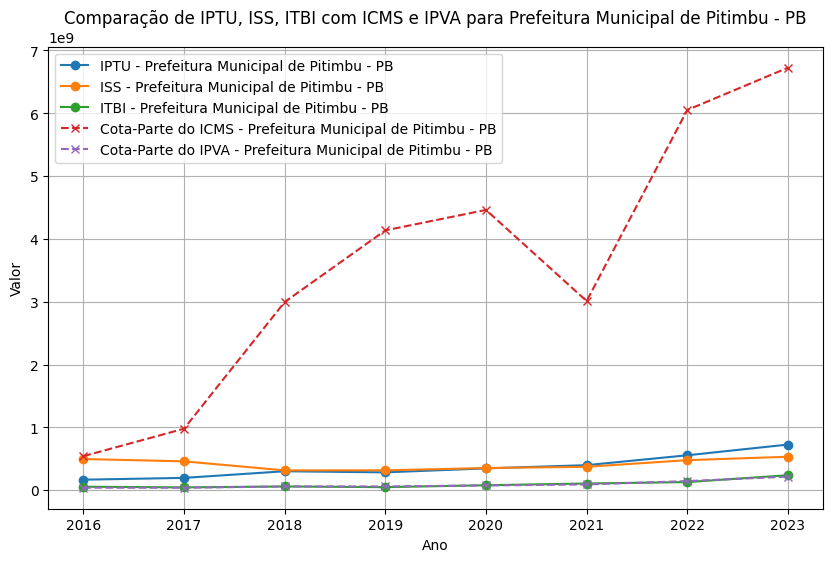

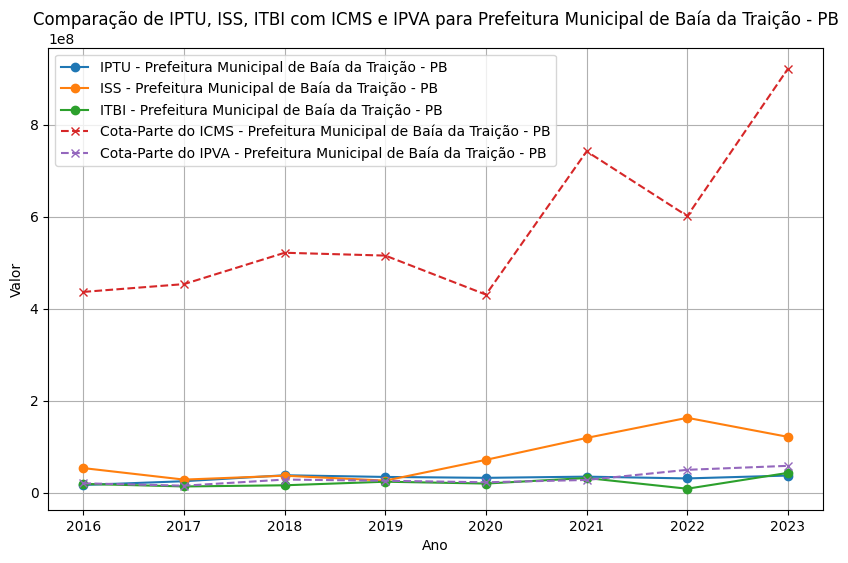

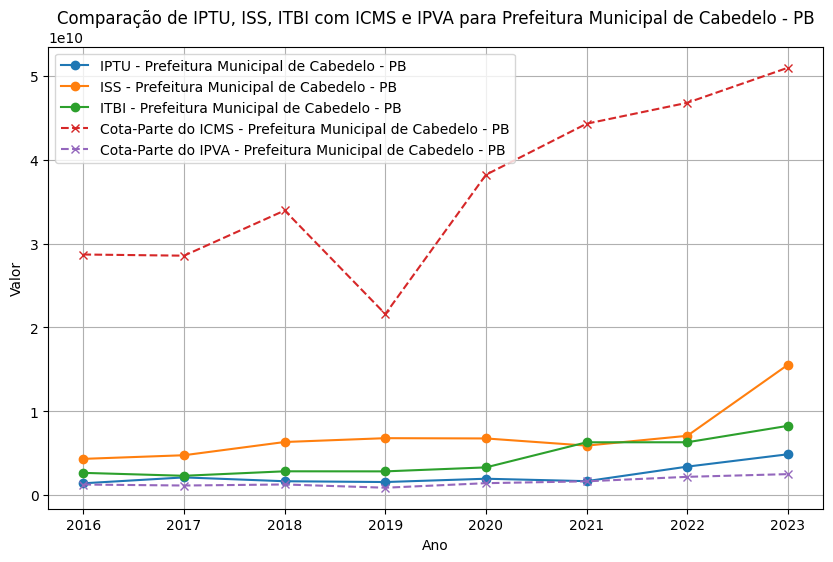

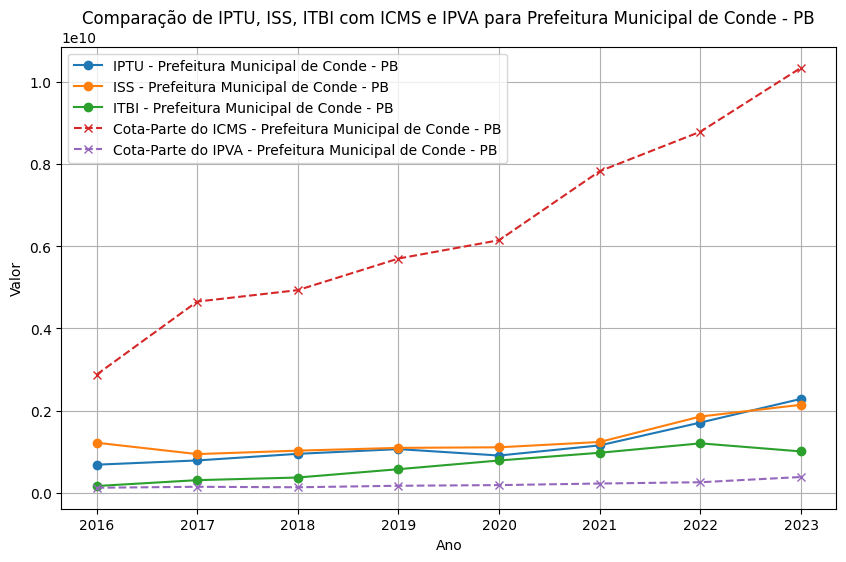

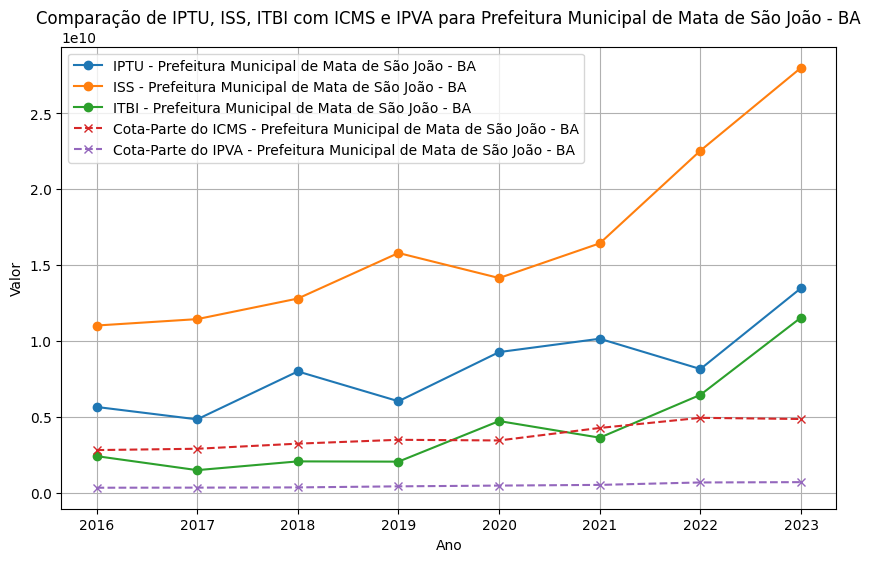

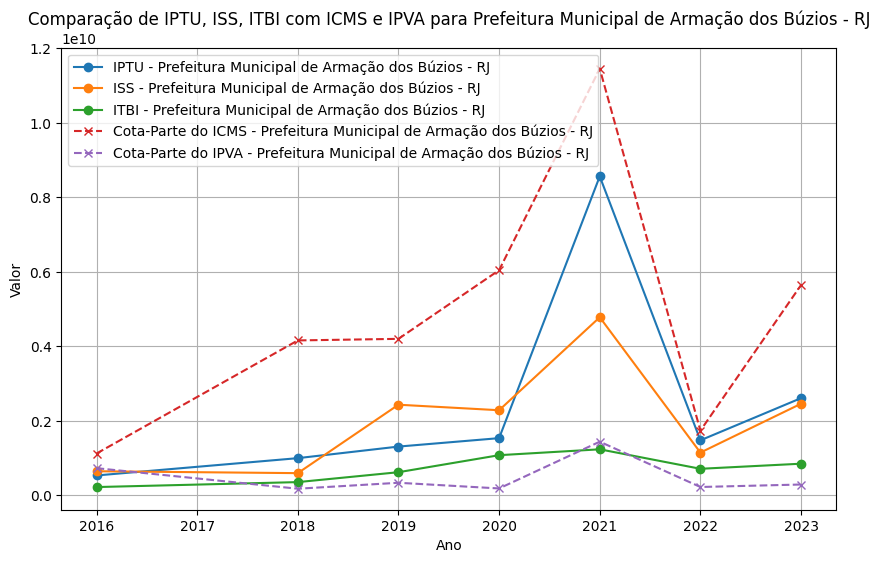

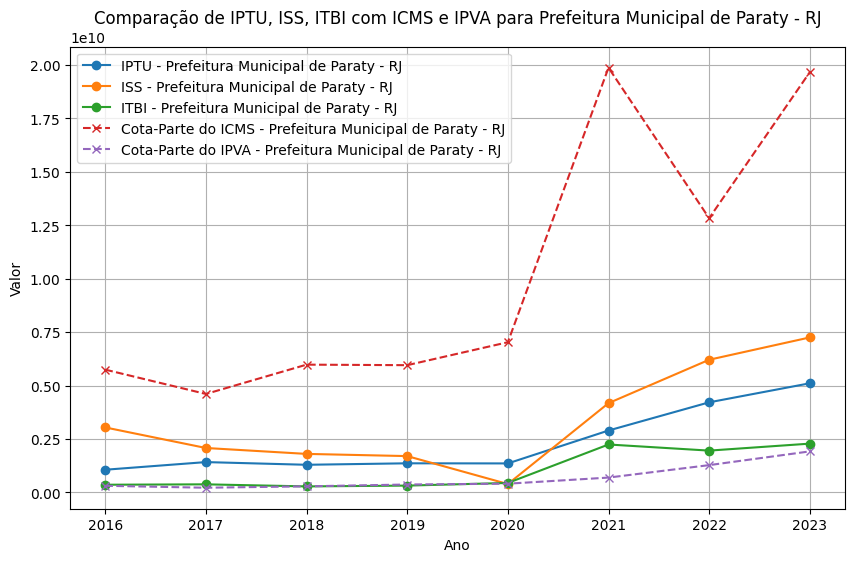

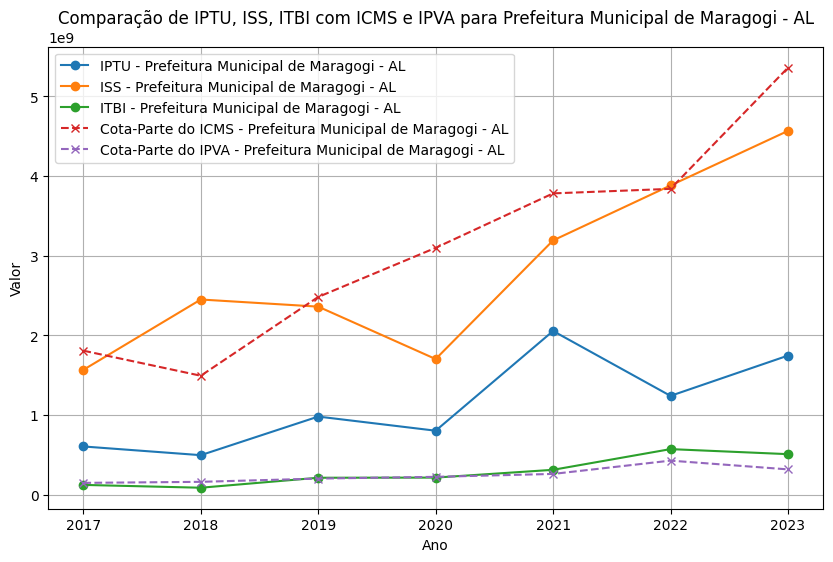

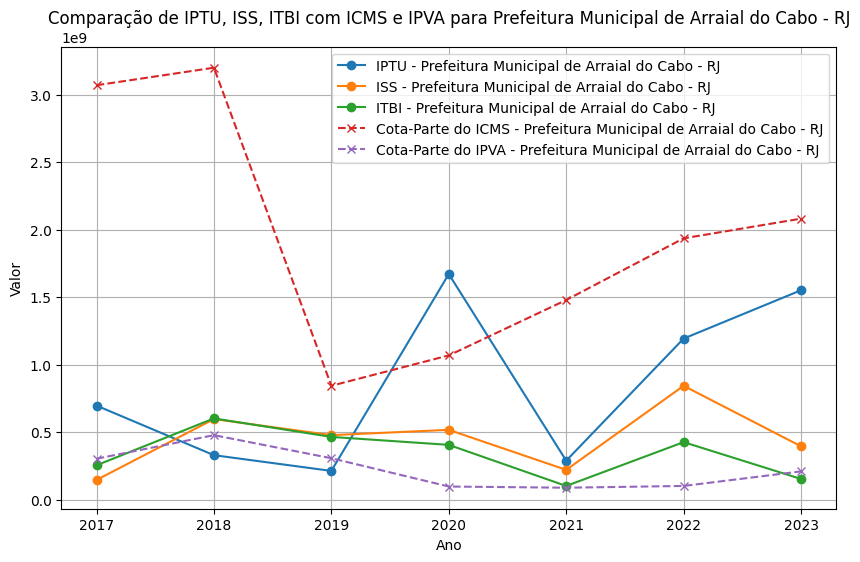

In [59]:
for cidade in df['Instituição'].unique():
    plt.figure(figsize=(10, 6))
    
    for conta in ['IPTU', 'ISS', 'ITBI']:
        df_conta = df[(df['Conta'] == conta) & (df['Instituição'].str.contains(cidade, case=False, na=False))]
        df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
        plt.plot(df_conta['Ano'], df_conta['Valor'], marker='o', label=f'{conta} - {cidade}')
    
    for conta in ['Cota-Parte do ICMS', 'Cota-Parte do IPVA']:
        df_conta = df[(df['Conta'] == conta) & (df['Instituição'].str.contains(cidade, case=False, na=False))]
        df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
        plt.plot(df_conta['Ano'], df_conta['Valor'], marker='x', linestyle='--', label=f'{conta} - {cidade}')
    
    plt.title(f'Comparação de IPTU, ISS, ITBI com ICMS e IPVA para {cidade}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend()
    plt.show()

Transforme as séries dos últimos 8 anos em um vetor de 7 coordenadas, correspondente aos valores percentuais de um ano para o seguinte, note que o primeiro ano não tem referência, por isso são só 7 valores.

Agora, faz-se uso de aprendizagem de máquina. Uma primeira técnica a ser utilizada é a ferramenta de predição. Estime os valores absolutos de todas as séries para os próximos dois anos. Neste ponto, vocês vão gerar diversos modelos de regressão. 
Dos 7 pontos que vocês tem para fazer a regressão, vocês vão pegar k deles para servirem de geração do modelo e os outros 7 − k vão ser usados para validar o modelo.
Para cada série vocês vão gerar os modelos para k variando de 2 até 6 (numa fase de ”cross validation”- validação cruzada).
Escolha os modelos com menores erros.

In [83]:
tributacoes = ['ISS', 'IPTU', 'ITBI']
df = df[df['Conta'].isin(tributacoes)]
df = df.sort_values(['Instituição', 'Conta', 'Ano'])


In [84]:
df['Variacao_percentual'] = df.groupby(['Instituição', 'Conta', 'Ano'])['Valor'].pct_change() * 100

In [88]:
df

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor,Ano,Variacao_percentual
35611,Prefeitura Municipal de Armação dos Búzios - RJ,3300233,RJ,31067,<MR-11>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,26588747.0,2016,NaN
35616,Prefeitura Municipal de Armação dos Búzios - RJ,3300233,RJ,31067,<MR-10>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,63010628.0,2016,136.982314
35621,Prefeitura Municipal de Armação dos Búzios - RJ,3300233,RJ,31067,<MR-9>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,13572596.0,2016,-78.459831
35626,Prefeitura Municipal de Armação dos Búzios - RJ,3300233,RJ,31067,<MR-8>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,11711139.0,2016,-13.714819
35631,Prefeitura Municipal de Armação dos Búzios - RJ,3300233,RJ,31067,<MR-7>,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,4297068.0,2016,-63.307856
...,...,...,...,...,...,...,...,...,...,...
467832,Prefeitura Municipal de Rio Tinto - PB,2512903,PB,24258,<MR-2>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,1570000.0,2023,53.046503
467837,Prefeitura Municipal de Rio Tinto - PB,2512903,PB,24258,<MR-1>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,420000.0,2023,-73.248408
467842,Prefeitura Municipal de Rio Tinto - PB,2512903,PB,24258,<MR>,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,1736727.0,2023,313.506429
467847,Prefeitura Municipal de Rio Tinto - PB,2512903,PB,24258,TOTAL (ÚLTIMOS 12 MESES),ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,19631800.0,2023,1030.390672


In [61]:
# Transform the series of the last 8 years into a vector of 7 coordinates, corresponding to the percentage values from one year to the next
def transform_series_to_percentage_vector(df, conta):
    df_conta = df[df['Conta'] == conta]
    df_conta = df_conta.groupby(['Instituição', 'Ano'])['Valor'].sum().reset_index()
    df_conta = df_conta.sort_values('Ano')
    
    # Calculate the percentage change from one year to the next
    df_conta['Percentage Change'] = df_conta['Valor'].pct_change() * 100
    
    # Drop the first row as it does not have a reference year
    percentage_vector = df_conta['Percentage Change'].dropna().values
    
    return percentage_vector

# Example usage
conta = 'Cota-Parte do IPVA'
percentage_vector = transform_series_to_percentage_vector(df, conta)
print(percentage_vector)

[-9.71889066e+01  5.05162779e+02  9.29669563e+02  1.06519212e+03
 -9.96885071e+01  2.73615830e+03 -9.87564294e+01  5.38165870e+01
  1.13377772e+03 -8.70521643e+01  1.56392755e+02  2.24503303e+02
  2.33754550e+02  1.70060105e+03 -9.42216586e+01 -8.10988130e+01
 -8.79678496e+01  4.57566684e+02 -6.74205567e+01 -5.98391120e+01
  1.66850329e+03 -6.65871000e+01 -6.49875267e+01 -6.17423060e+01
  8.63175287e+02  1.07174075e+02 -9.05752769e+01  3.71724956e+02
  2.54632262e+02  1.67956994e+02 -8.63824914e+01 -8.21646851e+01
  8.12066853e+02  2.48158123e+01 -9.43093159e+01  1.76756974e+02
  1.86587549e+02  1.05160600e+03  7.83879069e+02 -9.96332753e+01
  1.13440885e+02  1.39600639e+01 -8.28612676e+01  1.40803765e+02
  5.16346165e+02 -9.03070032e+01  1.08479134e+03 -5.95494367e+01
  1.03894259e+03 -9.66896233e+01  4.08512796e+04 -9.99019001e+01
  3.34006556e+03 -6.56384875e+01 -3.46990484e+01  6.67415677e+01
 -7.68383364e+01  1.41814093e+02  1.42788743e+04 -9.96381194e+01
  8.66898012e+01 -8.75501